# Explore here

Cargo conjunto de datos

In [1]:
# Your code here
import pandas as pd

df_ = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

df_.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [2]:
df_["date"] = pd.to_datetime(df_.date)
df_ = df_.set_index("date")
ts_total = df_["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

VISUALIZACION DE SERIE TEMPORAL

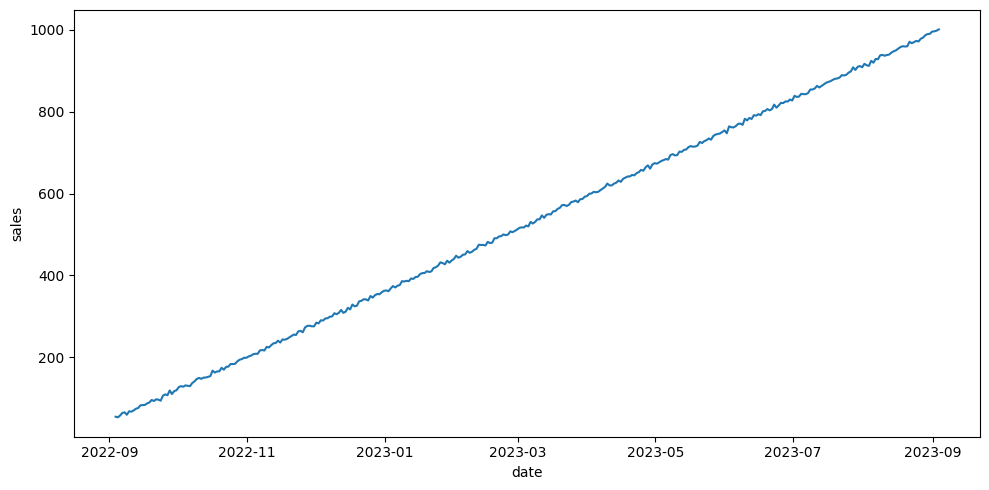

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)

plt.tight_layout()

plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_total)
decomposition

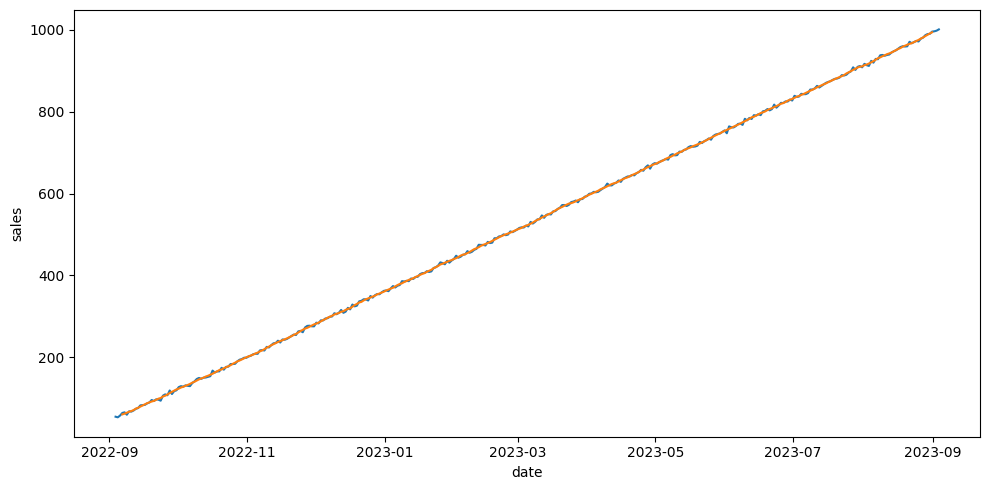

In [6]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

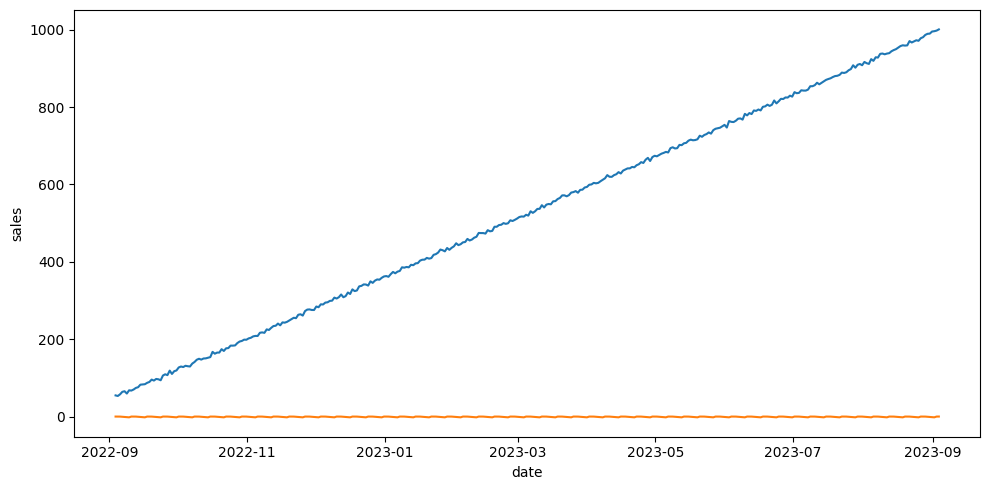

In [7]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

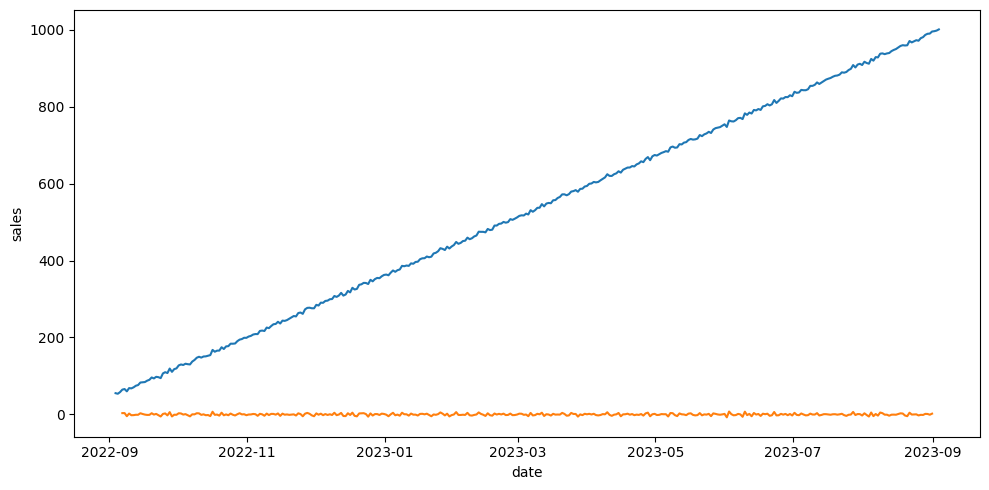

In [9]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

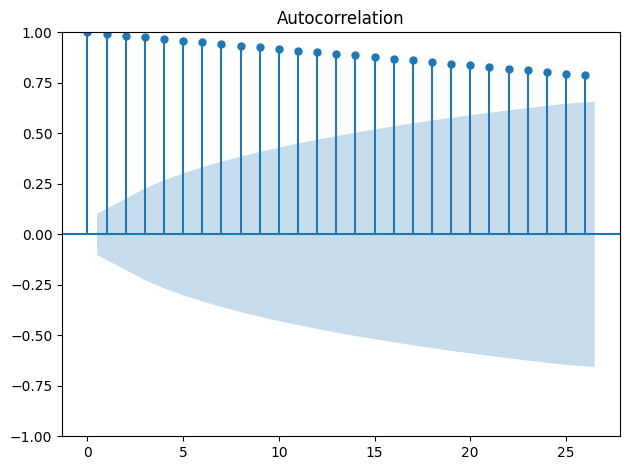

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_total)

plt.tight_layout()

plt.show()

ESTE ES EL MISMO BUG CON EL QUE TUVE QUE LIDIAR MAS DE UNA VEZ, NO PUDE SOLUCIONARLO NI CON AYUDA DE LEO NI DE JOSE, (ACLARO QUE SU PREDISPOSICIÖN FUE LA MEJOR, PERO SIMPLEMENTE NO ENCONTRAMOS COMO RESOLVERLO) Y SE RESOLVIÓ SOLO, VOLVI A CARGAR EL MISMO ARCHIVO CON DIAS DE DIFERENCIA Y FUNCIONÓ.

POR LO TANTO, SI POR ESTE ERROR EL PROYECTO NO ESTÁ APROBADO, SOLICITO QUE ME AYUDEN A RESOLVERLO... NO LO LOGRAMOS AL DIA DE HOY,

GRACIAS!

In [12]:
from pmdarima import auto_arima

model = auto_arima(ts_total, seasonal = False, trace = True, m = 7)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [14]:
import numpy as np
import sys
print(np.__version__)
print(sys.version)

2.1.1
3.10.12 (main, Jun  7 2023, 19:32:10) [GCC 10.2.1 20210110]


In [11]:
forecast = model.predict(60)
forecast

NameError: name 'model' is not defined

NameError: name 'forecast' is not defined

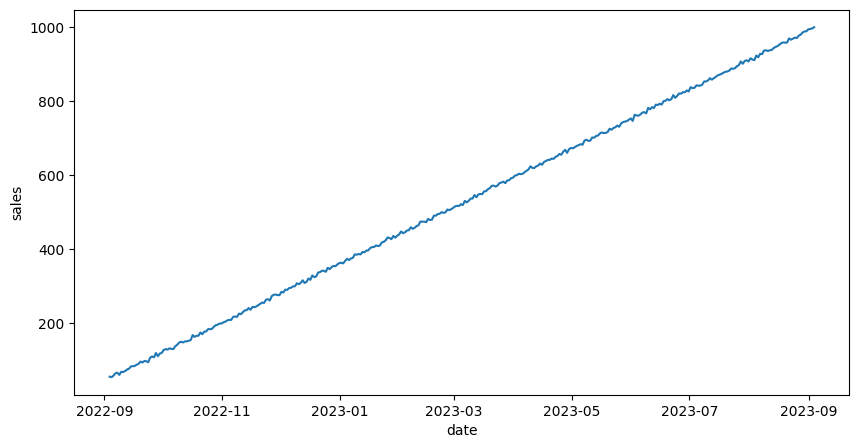

In [12]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()